In [1]:
# 引入 tensorflow 和 keras（神经网络库）
import tensorflow as tf
from tensorflow import keras

# 引入 numpy matplotlib 库
import numpy as np
import matplotlib.pyplot as plt

# tensorflow 版本
print(tf.__version__)

2.8.0


In [2]:
# 从 keras 导入服装图像数据集
from keras.datasets import fashion_mnist

# train_images 训练集图像 train_labels 训练集标签
# test_images 测试集图像 test_labels 测试集标签
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# 为方便理解，给每个标签（0-9）赋予一个名称（'T恤/上衣', '裤子', '套头衫', '连衣裙', '外套', '凉鞋', '衬衫', '运动鞋', '包', '短靴'）
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# 训练集图像格式（60000 张 28*28 的图像）
train_images.shape

(60000, 28, 28)

In [5]:
# 训练集标签同样有 60000 个
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
# 测试集图像格式（10000 张 28*28 的图像）
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

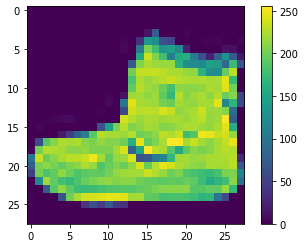

In [9]:
# 预览其中的一张图像
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# 将像素值归一化处理
# 由上图可知 28*28 图像中每个像素值位于 0~255 之间，所以除于 255
train_images = train_images / 255.0
test_images = test_images / 255.0

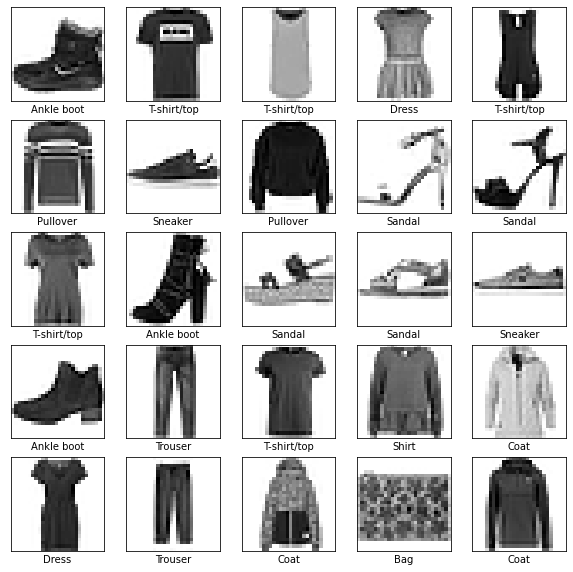

In [11]:
# 检查处理后的图像
plt.figure(figsize=(10,10), facecolor='white')
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
# 创建一个神经网络模型
# Sequential 序贯模型
# 第一层：将图像展平
# 第二层：128个节点，激活函数为 relu
# 第三层：10个节点（输出）
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [13]:
# 编译模型
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# 训练模型
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5011 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3781 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3379 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3156 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2949 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2798 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2662 - accuracy: 0.9023
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2585 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2481 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [15]:
# 评估模型
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n测试集准确率:', test_acc)

313/313 - 1s - loss: 0.3301 - accuracy: 0.8861 - 601ms/epoch - 2ms/step

测试集准确率: 0.8860999941825867


In [16]:
# 创建一个预测模型，在原有模型上添加一层归一化层（方便我们理解模型输出）
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([3.5173559e-10, 6.8110621e-11, 9.3861741e-12, 2.6786845e-08,
       2.5761335e-09, 1.4214523e-03, 6.6310695e-09, 1.5776880e-02,
       2.6553764e-08, 9.8280162e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

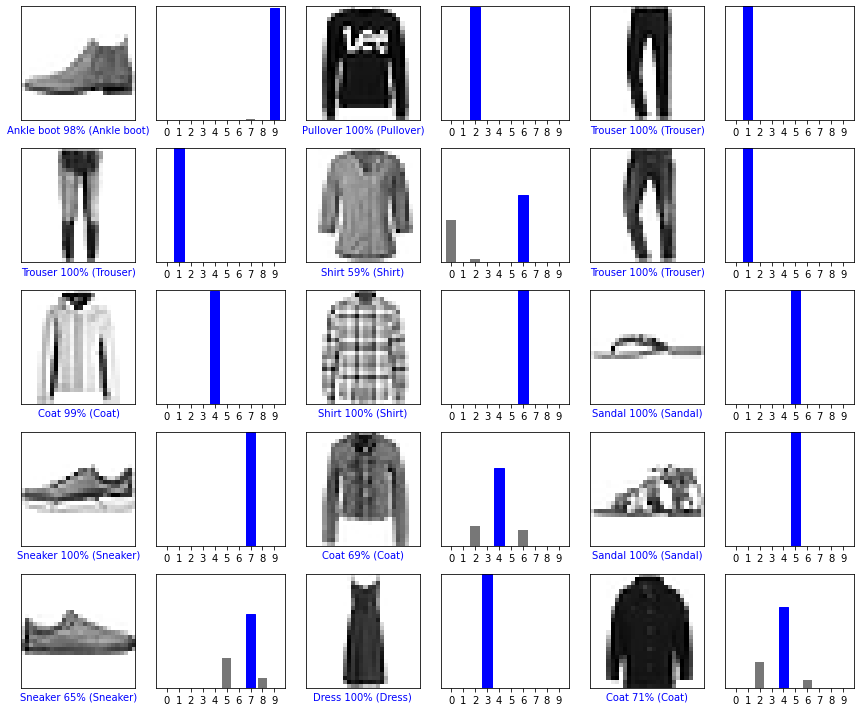

In [21]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()